# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
weather_api_key

'13fa171b0912bbccfde383fb17cfe24d'

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
       
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, j in enumerate(cities):
     
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + j.replace(" ","+")
    
# Log the url, record, and set numbers
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, {j}))
    
    
# Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_name = city_weather["name"]
        city_description = city_weather["weather"][0]["description"]
        city_country = city_weather["sys"]["country"]
        
# Append the City information into city_data list
        city_data.append({"City": city_name,       
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed":  city_wind,
                          "Current Description": city_description,
                          "Country": city_country})
     

# If an error is experienced, skip the city
    except:
        #print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | {'thompson'}
Processing Record 2 of Set 1 | {'badger'}
Processing Record 3 of Set 1 | {'ushuaia'}
Processing Record 4 of Set 1 | {'adamstown'}
Processing Record 5 of Set 1 | {'grytviken'}
Processing Record 6 of Set 1 | {'albany'}
Processing Record 7 of Set 1 | {'port alfred'}
Processing Record 8 of Set 1 | {'levuka'}
Processing Record 9 of Set 1 | {'invercargill'}
Processing Record 10 of Set 1 | {'kayangel'}
Processing Record 11 of Set 1 | {'salinas'}
Processing Record 12 of Set 1 | {'jamestown'}
Processing Record 13 of Set 1 | {'chonchi'}
Processing Record 14 of Set 1 | {'stanley'}
Processing Record 15 of Set 1 | {'papatowai'}
Processing Record 16 of Set 1 | {'zeya'}
Processing Record 17 of Set 1 | {'lazaro cardenas'}
Processing Record 18 of Set 1 | {'inarajan village'}
Processing Record 19 of Set 1 | {'virginia beach'}
Processing Record 20 of Set 1 | {'qaqortoq'}
Processing Record 21 of Set 1 |

In [8]:
city_data

[{'City': 'Thompson',
  'Lat': 55.7435,
  'Lng': -97.8558,
  'Max Temp': 21.15,
  'Humidity': 90,
  'Cloudiness': 100,
  'Wind Speed': 2.91,
  'Current Description': 'overcast clouds',
  'Country': 'CA'},
 {'City': 'Badger',
  'Lat': 64.8,
  'Lng': -147.5333,
  'Max Temp': -0.49,
  'Humidity': 83,
  'Cloudiness': 0,
  'Wind Speed': 4.61,
  'Current Description': 'clear sky',
  'Country': 'US'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 58.26,
  'Humidity': 61,
  'Cloudiness': 50,
  'Wind Speed': 3.2,
  'Current Description': 'scattered clouds',
  'Country': 'AR'},
 {'City': 'Adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 72.61,
  'Humidity': 78,
  'Cloudiness': 40,
  'Wind Speed': 10.92,
  'Current Description': 'scattered clouds',
  'Country': 'PN'},
 {'City': 'Grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 32.32,
  'Humidity': 86,
  'Cloudiness': 71,
  'Wind Speed': 27.02,
  'Current Description': 'snow',
  'Country': 'GS'},


In [9]:
city_weather

{'coord': {'lon': -43.8617, 'lat': -16.735},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 95.56,
  'feels_like': 92.34,
  'temp_min': 95.56,
  'temp_max': 95.56,
  'pressure': 1010,
  'humidity': 21,
  'sea_level': 1010,
  'grnd_level': 937},
 'visibility': 10000,
 'wind': {'speed': 7.25, 'deg': 98, 'gust': 10.29},
 'clouds': {'all': 10},
 'dt': 1701969114,
 'sys': {'country': 'BR', 'sunrise': 1701936865, 'sunset': 1701983969},
 'timezone': -10800,
 'id': 3456814,
 'name': 'Montes Claros',
 'cod': 200}

In [10]:
# # Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Current Description"]
# # Show Record Count
city_data_df = city_data_df[new_column_order] 
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Thompson,CA,55.7435,-97.8558,21.15,90,100,2.91,overcast clouds
1,Badger,US,64.8000,-147.5333,-0.49,83,0,4.61,clear sky
2,Ushuaia,AR,-54.8000,-68.3000,58.26,61,50,3.20,scattered clouds
3,Adamstown,PN,-25.0660,-130.1015,72.61,78,40,10.92,scattered clouds
4,Grytviken,GS,-54.2811,-36.5092,32.32,86,71,27.02,snow


In [11]:
# Display sample data
city_data

[{'City': 'Thompson',
  'Lat': 55.7435,
  'Lng': -97.8558,
  'Max Temp': 21.15,
  'Humidity': 90,
  'Cloudiness': 100,
  'Wind Speed': 2.91,
  'Current Description': 'overcast clouds',
  'Country': 'CA'},
 {'City': 'Badger',
  'Lat': 64.8,
  'Lng': -147.5333,
  'Max Temp': -0.49,
  'Humidity': 83,
  'Cloudiness': 0,
  'Wind Speed': 4.61,
  'Current Description': 'clear sky',
  'Country': 'US'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 58.26,
  'Humidity': 61,
  'Cloudiness': 50,
  'Wind Speed': 3.2,
  'Current Description': 'scattered clouds',
  'Country': 'AR'},
 {'City': 'Adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 72.61,
  'Humidity': 78,
  'Cloudiness': 40,
  'Wind Speed': 10.92,
  'Current Description': 'scattered clouds',
  'Country': 'PN'},
 {'City': 'Grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 32.32,
  'Humidity': 86,
  'Cloudiness': 71,
  'Wind Speed': 27.02,
  'Current Description': 'snow',
  'Country': 'GS'},


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
City_ID,,,,,,,,,
0,Thompson,CA,55.7435,-97.8558,21.15,90,100,2.91,overcast clouds
1,Badger,US,64.8000,-147.5333,-0.49,83,0,4.61,clear sky
2,Ushuaia,AR,-54.8000,-68.3000,58.26,61,50,3.20,scattered clouds
3,Adamstown,PN,-25.0660,-130.1015,72.61,78,40,10.92,scattered clouds
4,Grytviken,GS,-54.2811,-36.5092,32.32,86,71,27.02,snow


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

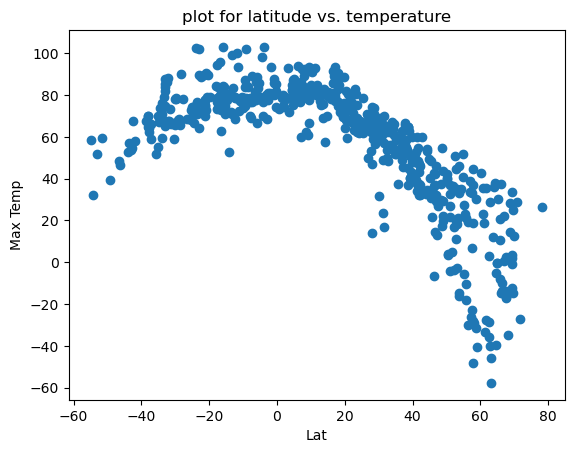

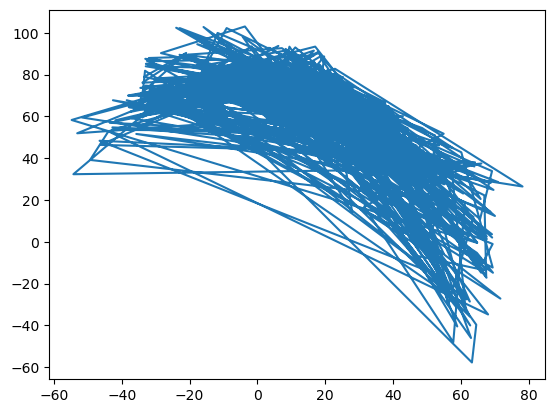

In [14]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title('plot for latitude vs. temperature')

# Display plot
plt.show()


# Incorporate the other graph properties

plt.plot(x, y)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

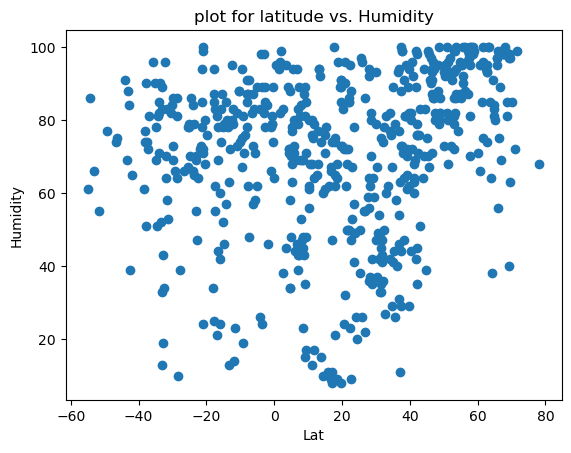

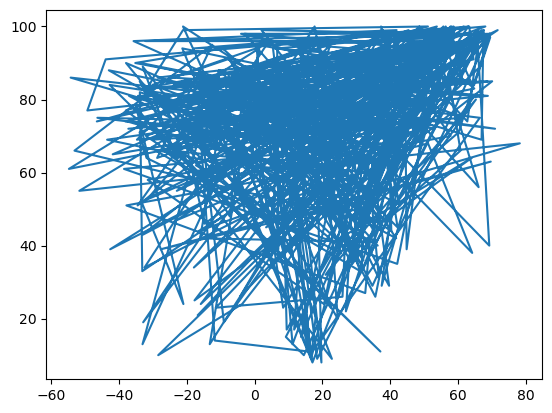

In [15]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x, y)
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title('plot for latitude vs. Humidity')
plt.show()
# Incorporate the other graph properties
plt.plot(x, y)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

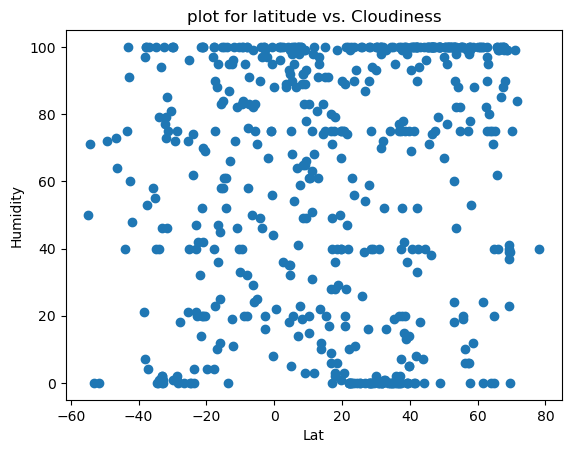

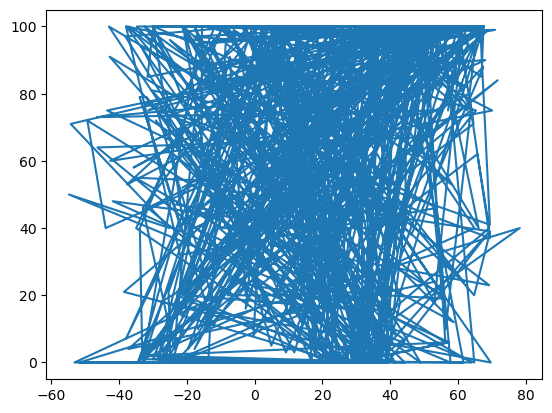

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x, y)
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title('plot for latitude vs. Cloudiness')
plt.show()

# Incorporate the other graph properties
plt.plot(x, y)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

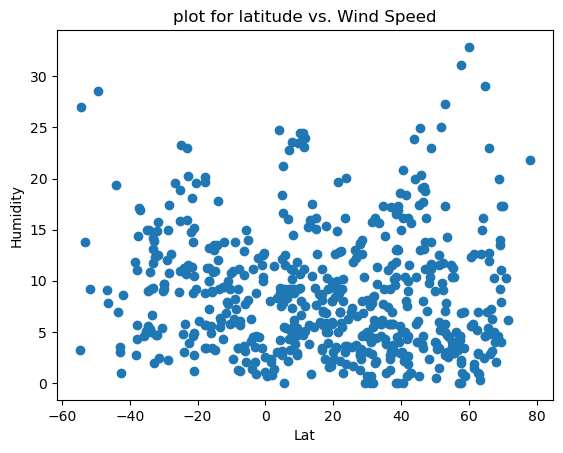

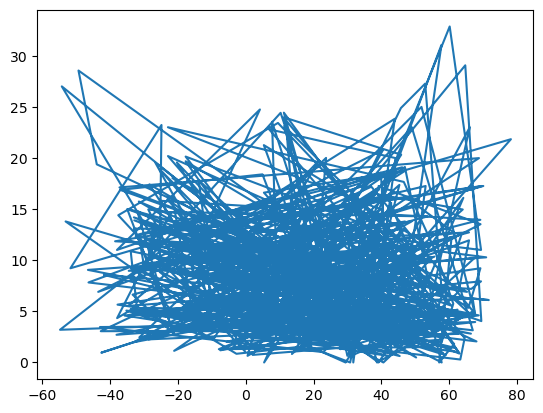

In [17]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x, y)
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title('plot for latitude vs. Wind Speed')
plt.show()

# Incorporate the other graph properties
plt.plot(x, y)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


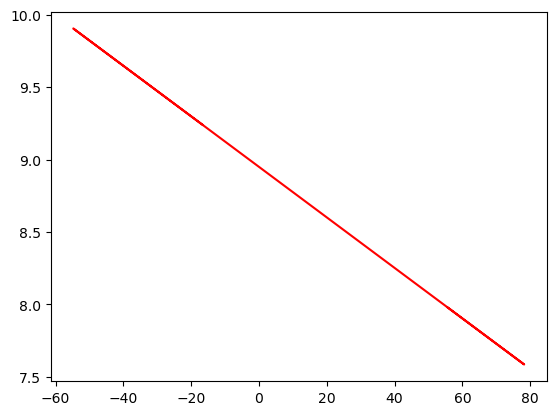

In [19]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =  city_data_df[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
City_ID,,,,,,,,,
0,Thompson,CA,55.7435,-97.8558,21.15,90,100,2.91,overcast clouds
1,Badger,US,64.8000,-147.5333,-0.49,83,0,4.61,clear sky
5,Albany,US,42.6001,-73.9662,34.54,76,94,1.01,light snow
7,Levuka,CA,50.1834,-105.4011,42.19,73,67,4.03,broken clouds
9,Kayangel,PW,8.0823,134.7173,83.73,69,19,14.52,few clouds


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
City_ID,,,,,,,,,
2,Ushuaia,AR,-54.8000,-68.3000,58.26,61,50,3.20,scattered clouds
3,Adamstown,PN,-25.0660,-130.1015,72.61,78,40,10.92,scattered clouds
4,Grytviken,GS,-54.2811,-36.5092,32.32,86,71,27.02,snow
6,Port Alfred,ZA,-33.5906,26.8910,68.18,90,1,5.01,clear sky
8,Invercargill,NZ,-46.4000,168.3500,46.36,75,64,7.83,broken clouds


###  Temperature vs. Latitude Linear Regression Plot

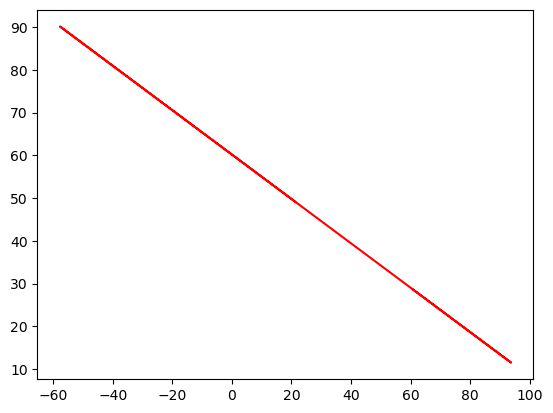

In [22]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df ["Max Temp"]
y = northern_hemi_df ["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

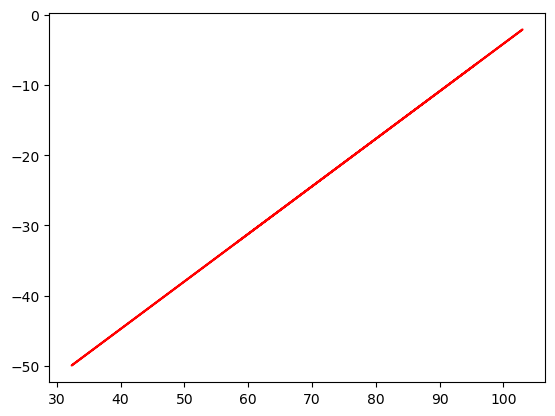

In [23]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df ['Max Temp']
y = southern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

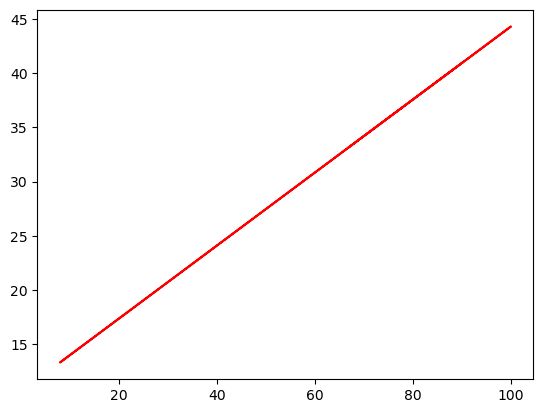

In [24]:
# Northern Hemisphere
x = northern_hemi_df ['Humidity']
y = northern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

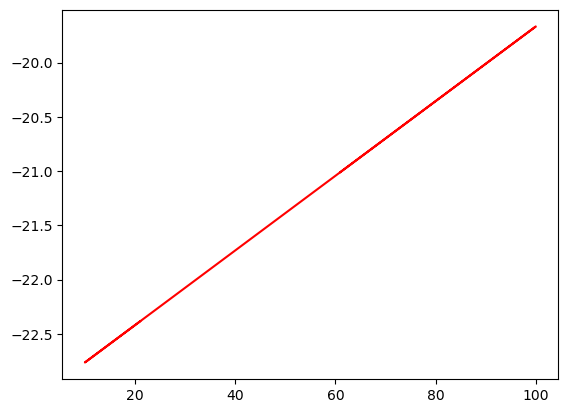

In [25]:
# Southern Hemisphere
x = southern_hemi_df ['Humidity']
y = southern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

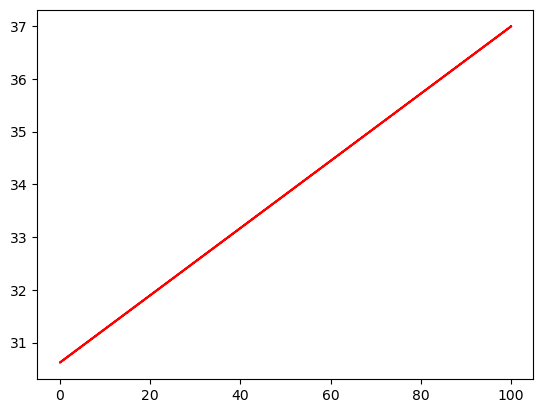

In [26]:
# Northern Hemisphere
x = northern_hemi_df ['Cloudiness']
y = northern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

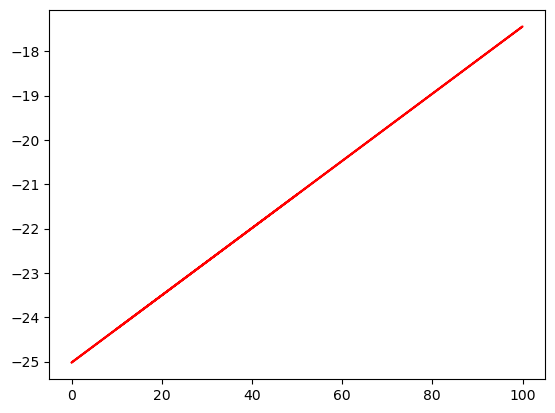

In [27]:
# Southern Hemisphere
x = southern_hemi_df ['Cloudiness']
y = southern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

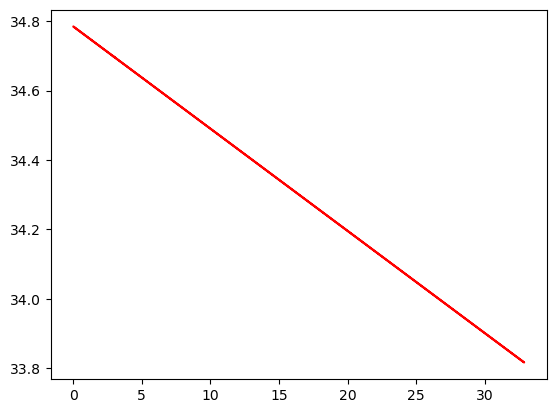

In [28]:
# Northern Hemisphere
x = northern_hemi_df ['Wind Speed']
y = northern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

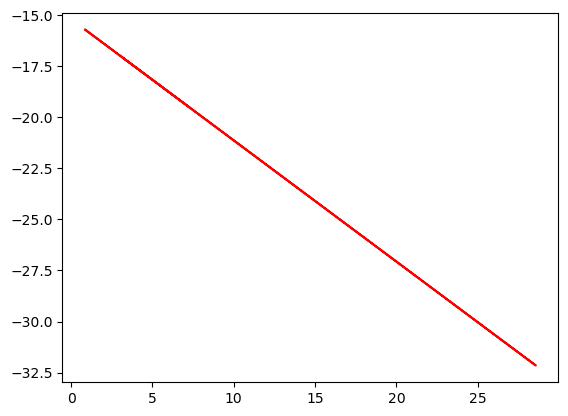

In [29]:
# Southern Hemisphere
x = southern_hemi_df ['Wind Speed']
y = southern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")

**Discussion about the linear relationship:** YOUR RESPONSE HERE